In [1]:
from filterpy.kalman import JulierSigmaPoints, MerweScaledSigmaPoints
import numpy as np

import matplotlib.pyplot as plt
sigmas = JulierSigmaPoints(n=2, kappa=1)
sigmas = MerweScaledSigmaPoints(2, alpha=0.1, beta=2., kappa=-1)


In [2]:
def fx(x, dt):
    xout = np.empty_like(x)
    xout[0] = x[1] * dt + x[0]
    xout[1] = x[1]
    return xout

def hx(x):
    return x[:1] # return position [x]

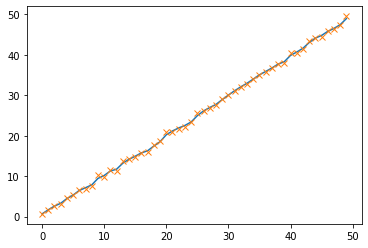

In [3]:
from numpy.random import randn
from filterpy.kalman import UnscentedKalmanFilter

ukf = UnscentedKalmanFilter(dim_x=2, dim_z=1, dt=1., hx=hx, fx=fx, points=sigmas)
ukf.P *= 10
ukf.R *= .5
ukf.Q = Q_discrete_white_noise(2, dt=1., var=0.03)

zs, xs = [], []
for i in range(50):
    z = i + randn()*.5
    ukf.predict()
    ukf.update(z)
    xs.append(ukf.x[0])
    zs.append(z)
    
plt.plot(xs);
plt.plot(zs, marker='x', ls='');